In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_daily = pd.read_csv('../data/processed/merged_daily.csv',parse_dates=['Date'])
df_weekly = pd.read_csv('../data/processed/merged_weekly.csv', parse_dates=['Date'])

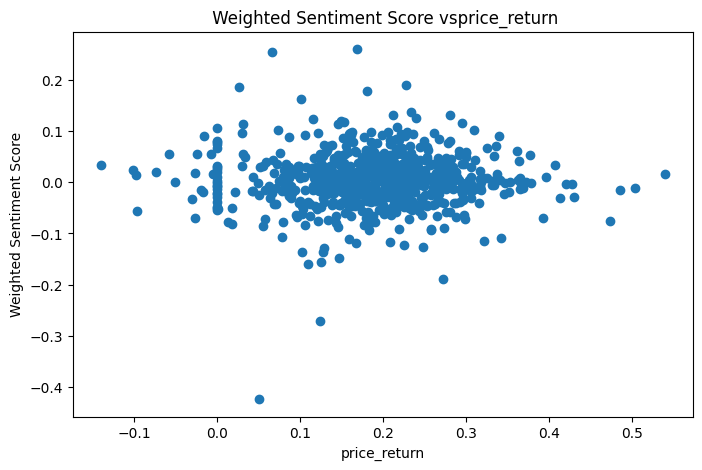

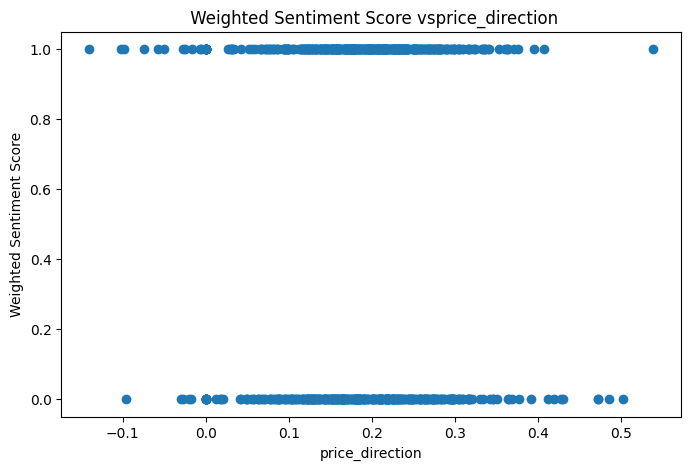

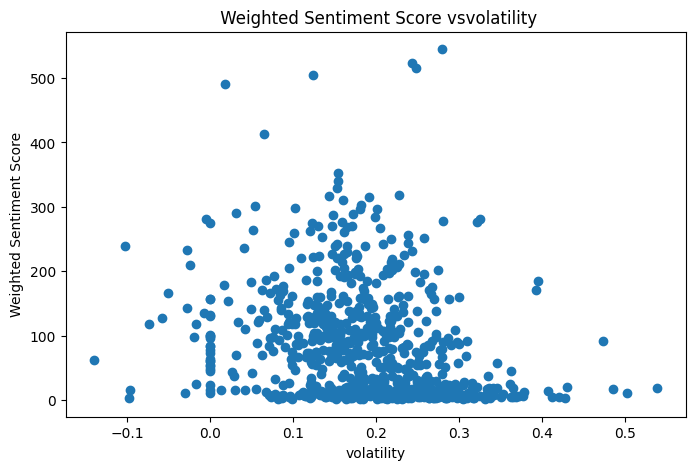

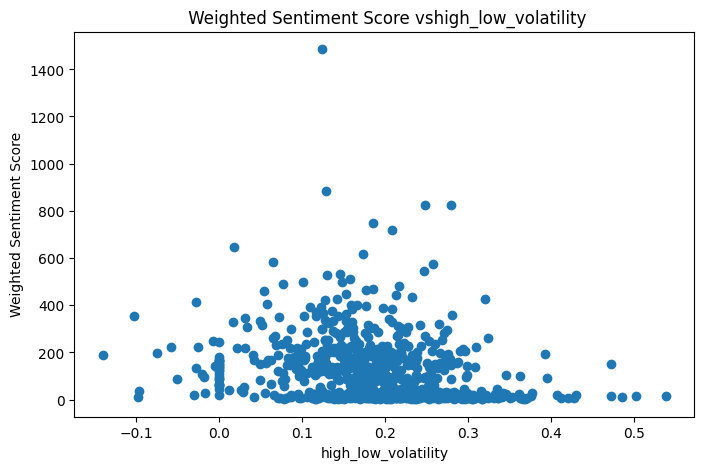

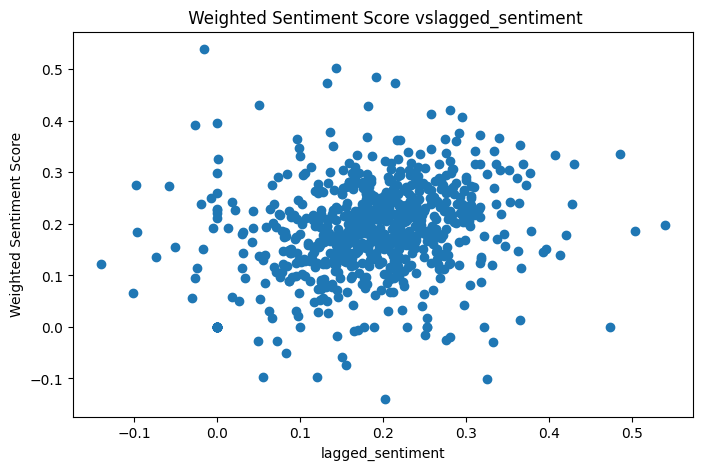

In [4]:
columns_to_plot = ['price_return','price_direction','volatility','high_low_volatility','lagged_sentiment']

for col in columns_to_plot:
    plt.figure(figsize=(8,5))
    plt.scatter(df_daily['weighted_sentiment_score'],df_daily[col])
    plt.ylabel("Weighted Sentiment Score")
    plt.xlabel(col)
    plt.title(f' Weighted Sentiment Score vs{col}')
    plt.show()

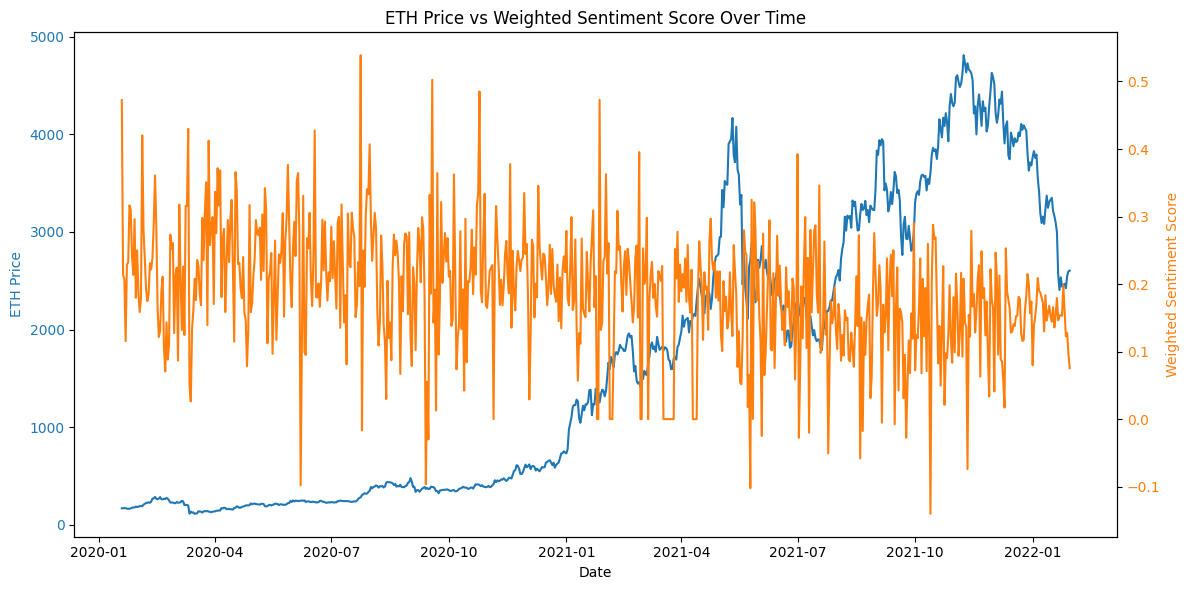

In [16]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df_daily['Date'], df_daily['Close'], color='tab:blue', label="ETH Price")
ax1.set_xlabel('Date')
ax1.set_ylabel('ETH Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df_daily['Date'], df_daily['weighted_sentiment_score'], color='tab:orange', label='Mean Sentiment')
ax2.set_ylabel('Weighted Sentiment Score', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('ETH Price vs Weighted Sentiment Score Over Time')
fig.tight_layout()
plt.show()

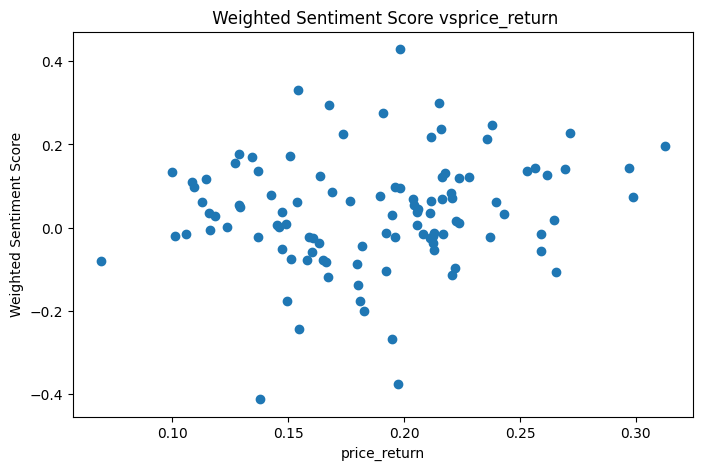

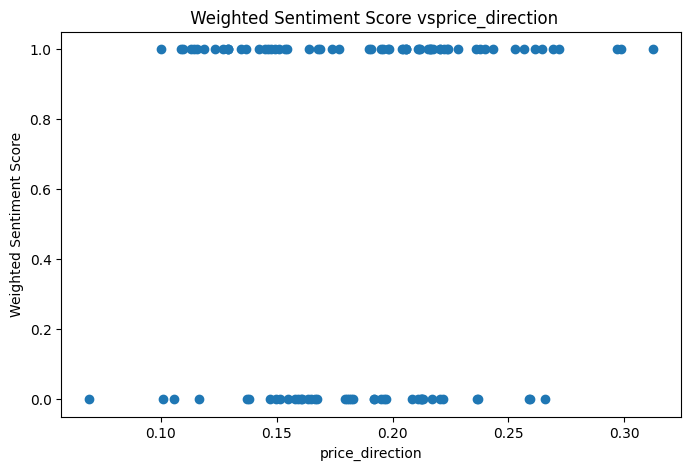

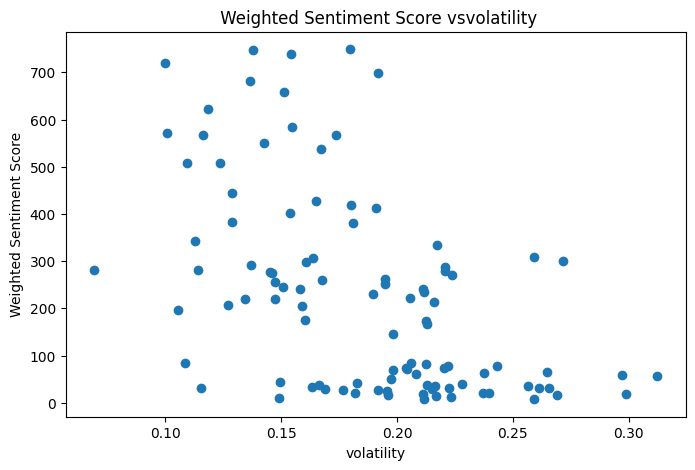

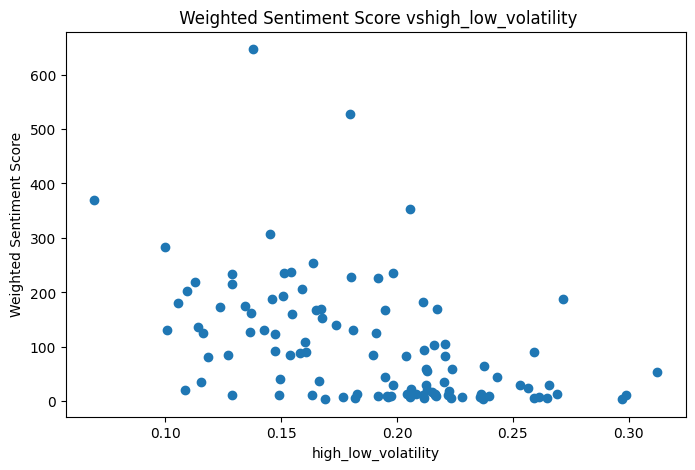

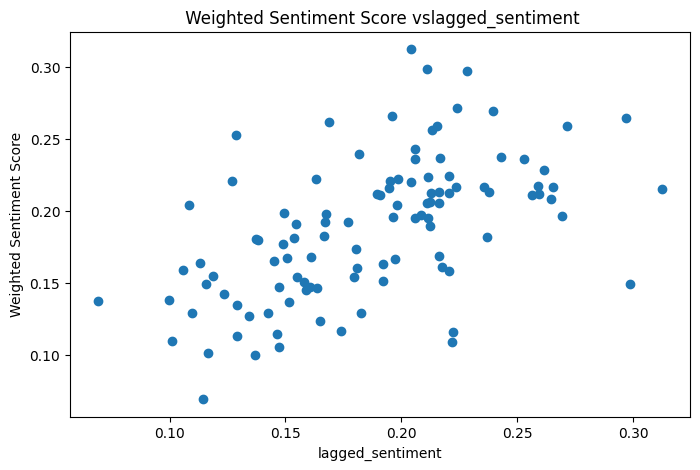

In [5]:
# Weekly Graphing
columns_to_plot = ['price_return','price_direction','volatility','high_low_volatility','lagged_sentiment']

for col in columns_to_plot:
    plt.figure(figsize=(8,5))
    plt.scatter(df_weekly['weighted_sentiment_score'],df_weekly[col])
    plt.ylabel("Weighted Sentiment Score")
    plt.xlabel(col)
    plt.title(f' Weighted Sentiment Score vs{col}')
    plt.show()